# File and libraries

In [1]:
import pandas as pd
import numpy as np


filepath=r'data/df_merch_7_bal_input'
test_filepath= f"{filepath}_test.csv"
train_filepath= f"{filepath}_train.csv"

file_tag = "df_merch_final"

# DSLabs functions

In [2]:
%run "scripts/dslabs_functions.py"


# Data functions

In [3]:
%run "scripts/data_functions.py"


data_functions lodaded


# Load

In [4]:

# test_data=True
test_data=False

# use to evaluate strategies. otherwise False to just transform data 
evaluate=True
# evaluate=False


if test_data==True:

    data=pd.read_csv(f"{filepath}.csv")
    
    test= pd.read_csv(test_filepath)
    train= pd.read_csv(train_filepath)

    sample=0.01
    data = data.groupby('day_of_year').apply(lambda x: sample_per_day(x, sample)).reset_index(drop=True)
    test = test.groupby('day_of_year').apply(lambda x: sample_per_day(x, sample)).reset_index(drop=True)
    train = train.groupby('day_of_year').apply(lambda x: sample_per_day(x, sample)).reset_index(drop=True)
   
    
else:
    data=pd.read_csv(f"{filepath}.csv")  
    test= pd.read_csv(test_filepath)
    train= pd.read_csv(train_filepath)

    # larger sample 10%
    sample=0.10
    data = data.groupby('day_of_year').apply(lambda x: sample_per_day(x, sample)).reset_index(drop=True)
    test = test.groupby('day_of_year').apply(lambda x: sample_per_day(x, sample)).reset_index(drop=True)
    train = train.groupby('day_of_year').apply(lambda x: sample_per_day(x, sample)).reset_index(drop=True)


 
target='returning_user'
vars: list[str] = data.columns.to_list()
labels: list = list(data[target].unique())


# ensure sorting by day_of_year for correct splitting 
# "When in the presence of temporal data, data partition shall use older data to train and newer to test, in order to not use future data to classify past data. In any other case, partition shall be random."
data.sort_values(by='day_of_year', inplace=True)
test.sort_values(by='day_of_year', inplace=True)
train.sort_values(by='day_of_year', inplace=True)



data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36341 entries, 0 to 36340
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   device_category           36341 non-null  float64
 1   traffic_source_medium     36341 non-null  float64
 2   traffic_source_source     36341 non-null  float64
 3   day_of_year               36341 non-null  float64
 4   page_path_level_3         36341 non-null  float64
 5   path_length               36341 non-null  float64
 6   time_of_day_sin           36341 non-null  float64
 7   time_of_day_cos           36341 non-null  float64
 8   local_hour_sin            36341 non-null  float64
 9   local_hour_cos            36341 non-null  float64
 10  local_minute_sin          36341 non-null  float64
 11  local_minute_cos          36341 non-null  float64
 12  hour_minute_fraction_sin  36341 non-null  float64
 13  hour_minute_fraction_cos  36341 non-null  float64
 14  day_sin    

# Distribution Check

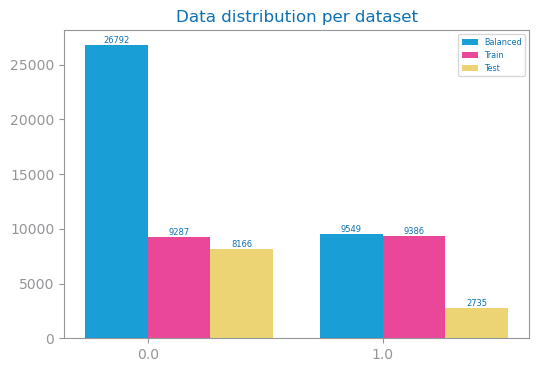

In [5]:
from pandas import concat
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_multibar_chart


# Distribution check


# Create a dictionary to store original class counts
values: dict[str, list[int]] = {
    "Balanced": [
        len(data[data[target] == 0]),  # Assuming 0 is the negative class
        len(data[data[target] == 1]),  # Assuming 1 is the positive class
    ]
}

values["Train"] = [
    len(train[train[target] == 0]),
    len(train[train[target] == 1]),
]
values["Test"] = [
    len(test[test[target] == 0]),
    len(test[test[target] == 1]),
]

# Visualize the distribution
figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title="Data distribution per dataset")
show()

## Evaluate for best model - RForests

Train#=18673 Test#=10901
Labels=[0.0, 1.0]
RF best for 500 trees (d=2 and f=0.1)


<Figure size 640x480 with 0 Axes>

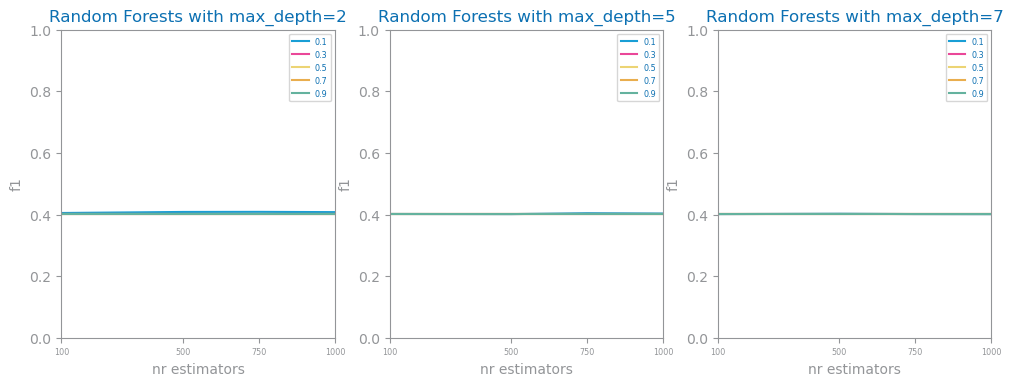

In [6]:
if evaluate==True:

    trnX, tstX, trnY, tstY, labels, vars = read_train_test_from_files(train, test, target)
    print(f'Train#={len(trnX)} Test#={len(tstX)}')
    print(f'Labels={labels}')

    figure()

    eval_metric = 'f1'

    best_model, params = random_forests_study(
    trnX,
    trnY,
    tstX,
    tstY,
    nr_max_trees=1000,
    lag=250,
    metric=eval_metric,
    )
    
    savefig(f'images/{file_tag}_rf_{eval_metric}_study.png')
    show()
    

# Best Model Performance

<Figure size 640x480 with 0 Axes>

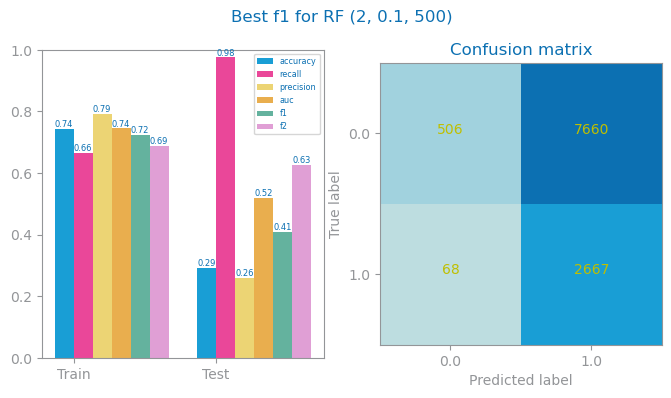

In [7]:
if evaluate == True:
    prd_trn: array = best_model.predict(trnX)
    prd_tst: array = best_model.predict(tstX)
    figure()
    plot_evaluation_results(params, trnY, prd_trn, tstY, prd_tst, labels)
    savefig(f'images/{file_tag}_rf_{params["name"]}_best_{params["metric"]}_eval.png')
    show()

# Variables importance


1. day_of_year (0.18327836743876916)
2. week_of_month_nr_sin (0.10529140145090767)
3. traffic_source_source (0.10048915613537249)
4. day_cos (0.0959099412554563)
5. week_of_month_nr_cos (0.08917323937438291)
6. traffic_source_medium (0.08653710271690551)
7. day_sin (0.07232816564459274)
8. page_path_level_3 (0.053726452844761755)
9. day_of_week_nr_cos (0.05136804926106629)
10. is_weekend (0.0455502804649196)
11. hour_minute_fraction_sin (0.025320477575188696)
12. path_length (0.020797315824253437)
13. hour_minute_fraction_cos (0.01647491032578427)
14. time_of_day_sin (0.012062204862353215)
15. local_hour_sin (0.01192120257947072)
16. local_hour_cos (0.0085038596924695)
17. local_minute_sin (0.0076220989978800086)
18. geo_country (0.004143993150008224)
19. day_of_week_nr_sin (0.004039313680007688)
20. local_minute_cos (0.002790157434261458)
21. time_of_day_cos (0.0015621456434782757)
22. device_category (0.001110163647710136)
23. quarter (0.0)
24. year (0.0)


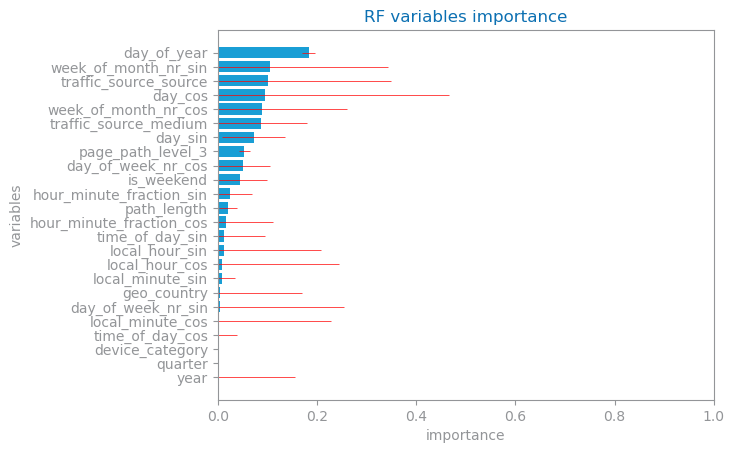

In [8]:
if evaluate==True:
    from numpy import std, argsort
    from dslabs_functions import plot_horizontal_bar_chart

    stdevs: list[float] = list(
        std([tree.feature_importances_ for tree in best_model.estimators_], axis=0)
    )
    importances = best_model.feature_importances_
    indices: list[int] = argsort(importances)[::-1]
    elems: list[str] = []
    imp_values: list[float] = []
    for f in range(len(vars)):
        elems += [vars[indices[f]]]
        imp_values.append(importances[indices[f]])
        print(f"{f+1}. {elems[f]} ({importances[indices[f]]})")

    figure()
    plot_horizontal_bar_chart(
        elems,
        imp_values,
        error=stdevs,
        title="RF variables importance",
        xlabel="importance",
        ylabel="variables",
        percentage=True,
    )
    savefig(f"images/{file_tag}_rf_{eval_metric}_vars_ranking.png")

# Overfitting

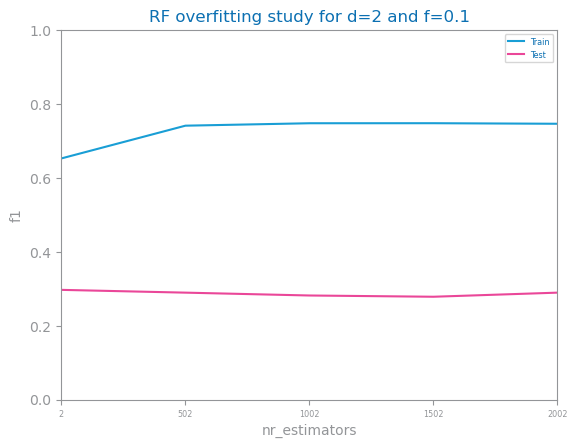

In [9]:
if evaluate==True:
    
    d_max: int = params["params"][0]
    feat: float = params["params"][1]
    nr_estimators: list[int] = [i for i in range(2, 2501, 500)]

    y_tst_values: list[float] = []
    y_trn_values: list[float] = []
    acc_metric: str = "accuracy"

    for n in nr_estimators:
        clf = RandomForestClassifier(n_estimators=n, max_depth=d_max, max_features=feat)
        clf.fit(trnX, trnY)
        prd_tst_Y: array = clf.predict(tstX)
        prd_trn_Y: array = clf.predict(trnX)
        y_tst_values.append(CLASS_EVAL_METRICS[acc_metric](tstY, prd_tst_Y))
        y_trn_values.append(CLASS_EVAL_METRICS[acc_metric](trnY, prd_trn_Y))

    figure()
    plot_multiline_chart(
        nr_estimators,
        {"Train": y_trn_values, "Test": y_tst_values},
        title=f"RF overfitting study for d={d_max} and f={feat}",
        xlabel="nr_estimators",
        ylabel=str(eval_metric),
        percentage=True,
    )
    savefig(f"images/{file_tag}_rf_{eval_metric}_overfitting.png")

# Analysis

- Traffic source and medium with higher importance
- overfitting from level 3
